In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### PCA

In [2]:
from sklearn.decomposition import PCA
X = np.random.rand(200,50)

In [3]:
pcaModel = PCA()
pcaModel.fit(X)

PCA()

$\;\;\;\;$ <code>pcaModel.explained_variance_ratio_</code> will tell a kind of componet that is important or less. That value form 0 to 1.

In [4]:
nc = np.where(pcaModel.explained_variance_ratio_.cumsum()>0.95)[0][0]

In [5]:
# total number of componet that > 0.95
# So this example we accept loss of noise data = 0.05
nc

42

In [6]:
pcaModel.n_components_

50

In [7]:
def myPCA(energyValue,X):
    m = PCA()
    m.fit(X)
    nc = np.where(m.explained_variance_ratio_.cumsum()>energyValue)[0][0]
    m = PCA(n_components=nc)
    m.fit(X)
    X2 = m.transform(X)
    return X2

In [8]:
X = np.random.rand(200,50)
X2 = myPCA(0.90,X)

In [9]:
X.shape

(200, 50)

In [10]:
type(X2)

numpy.ndarray

$\;\;\;\;$ So the dimension will reduce from 50d to 38d with component score > 0.90.

In [11]:
X2.shape

(200, 37)

### Make a pipeline

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [13]:
# Polynomial function
def PR(degree=2,**kwargs):
    p = make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))
    return p

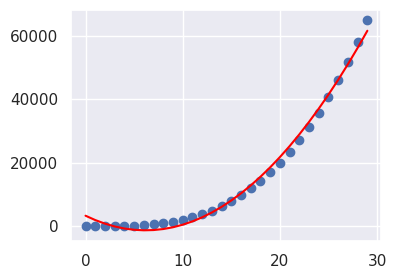

In [14]:
X = np.arange(30)

plt.figure(figsize=(4,3))
y = 3*(X**3)-10*(X**2)+34 + np.random.randn(X.size)
y_pred = PR(2).fit(X[:,np.newaxis],y).predict(X[:,np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

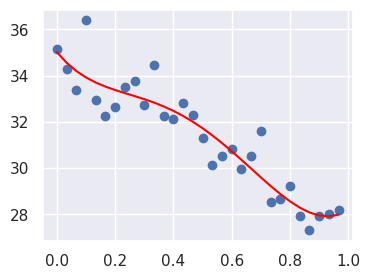

In [15]:
X = np.arange(30)/30

plt.figure(figsize=(4,3))
y = 3*(X**3)-10*(X**2)+34 + np.random.randn(X.size)
y_pred = PR(5).fit(X[:,np.newaxis],y).predict(X[:,np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

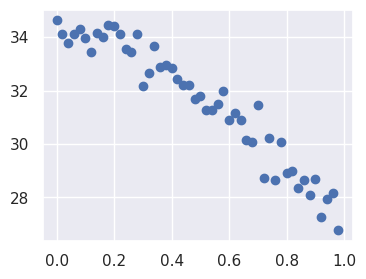

In [16]:
X = np.arange(50)/50
plt.figure(figsize=(4,3))
y = 3*(X**3)-10*(X**2)+34 + (0.5)*np.random.randn(X.size)
plt.scatter(X,y)

### Cross Validation

In [17]:
from sklearn.model_selection import validation_curve

In [18]:
degree = np.arange(0,15)
train_score,val_score = validation_curve(
    PR(),
    X[:,np.newaxis],
    y,
    param_name='polynomialfeatures__degree',
    param_range= degree,
    cv=5
)

Text(0, 0.5, 'score')

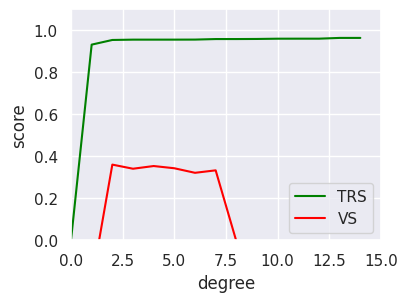

In [19]:
plt.figure(figsize=(4,3))
plt.plot(degree,np.median(train_score,1),color='green',label="TRS")
plt.plot(degree,np.median(val_score,1),color='red',label="VS")
plt.legend(loc='best')
plt.ylim(0,1.1)
plt.xlabel("degree")
plt.xlim(0,15)
plt.ylabel("score")

### Face Recognition pipeline

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [21]:
faces.data.shape
#(row, feature)

(1560, 2914)

In [22]:
faces.images[0].shape

(62, 47)

In [23]:
62*47

2914

In [24]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [25]:
faces.target_names.size

12

In [26]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [27]:
faces.target_names[4]

'Gerhard Schroeder'

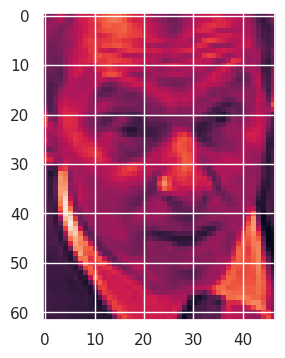

In [29]:
plt.figure(figsize=(3,4))
plt.imshow(faces.images[0])

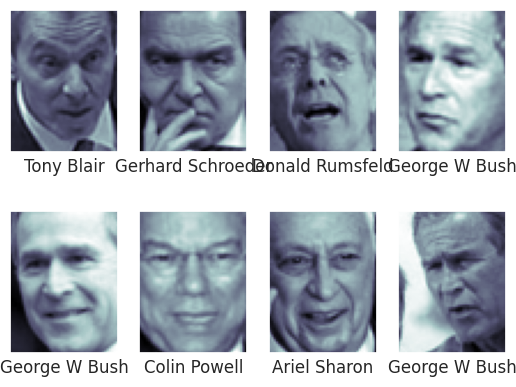

In [30]:
fig , ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap='bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [31]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [32]:
pcaModel = PCA(n_components=150,whiten=True)
svmModel = SVC(kernel='rbf',class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [33]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C':[1,5,15,30],
    'svc__gamma':[0.00001,0.00005,0.0001,0.005]
}
grid = GridSearchCV(mdl,param_grid)

In [35]:
grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [36]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [37]:
mdl = grid.best_estimator_

In [38]:
y_pred = mdl.predict(Xtest)

In [39]:
ytest

array([ 0,  1,  3,  3,  0,  3,  0,  1,  1,  1,  1,  3, 11,  3,  3,  7,  2,
       10, 11,  1,  4, 11,  3,  1,  1,  0,  5,  4,  3,  6,  1,  3, 10,  3,
        3,  0,  7,  2,  1,  3,  8,  3,  5,  3,  1,  6,  1,  3,  6,  6,  0,
        3,  1,  9, 11,  9,  3, 11,  7,  0,  3,  1,  1,  2,  3,  3,  2,  1,
        8,  0,  1,  6, 11,  3, 11,  9,  3, 10, 11,  5,  1,  0,  1,  9,  3,
        3, 11,  1,  3,  3,  6,  3,  3,  1,  2,  3,  3,  4,  3,  5,  4,  3,
       11,  3,  4,  3,  3,  1,  3,  3,  8,  3,  4, 11,  2,  3,  5, 11,  5,
        8,  1,  3,  6,  3,  3,  6,  1,  3,  3,  3,  2,  1,  7,  3,  2,  6,
        8,  9,  3,  5,  3,  3,  1,  1,  3,  0,  0,  3,  3,  1,  4,  3,  3,
        2,  2,  5,  2,  3,  4,  1,  4,  3,  5,  3,  1,  0,  0,  3, 10,  3,
        3,  4, 10,  2,  3,  3,  3,  3,  3,  3,  1,  5,  3,  3,  4,  1, 10,
        2,  1,  5,  1,  3,  3, 11,  0,  2,  2,  5,  5,  5,  6,  1,  3,  5,
       11,  4,  3,  6,  3,  9,  3, 11,  5,  2,  4,  2,  8,  7,  0,  1,  3,
        2,  7, 11, 11,  3

In [40]:
y_pred

array([ 0,  1,  3,  3,  1,  3,  0,  1,  1,  0,  1,  3, 11,  3,  3,  7,  2,
       10,  3,  1,  4,  8,  3,  1,  1,  0,  5, 11,  3,  6,  1,  3, 10,  1,
        3,  1,  1,  3,  1,  3,  8,  3,  3,  3,  1, 11,  3,  3,  6,  2,  0,
        3,  1,  9, 11,  9,  3,  4,  7,  0,  3,  1,  1,  3,  3,  3,  2,  1,
        0, 11,  1,  6, 11,  3, 11,  9,  1, 10, 11,  5,  1,  0,  1,  9,  3,
        3, 11,  1,  3,  3,  6,  3,  3,  1, 11,  3,  3, 11,  3,  5,  4,  3,
       11,  3,  4,  3,  3,  1,  3,  4,  8,  3,  4, 11,  2,  3,  5, 11,  5,
        8,  0,  3,  6,  3,  3,  1,  1,  3,  3, 11,  2,  1,  7,  3,  2,  6,
        8, 11,  3,  3,  3,  3,  1, 11,  3,  1,  0,  3,  3,  1,  1,  3,  3,
       11,  2, 10,  2,  3,  4,  1,  4,  3,  1,  3,  1,  0,  1,  3, 10,  3,
        3,  4,  3,  2,  3,  3,  3,  3,  3,  3,  1,  5,  1,  3,  4,  1, 10,
        2,  1,  1,  1,  3,  3, 11,  0,  3,  1,  8,  5,  5,  1,  1,  3,  5,
       11,  3,  3, 10,  3,  9,  3, 11,  5,  2,  4,  2, 11,  7,  0,  1,  2,
        2,  2, 10, 11,  3

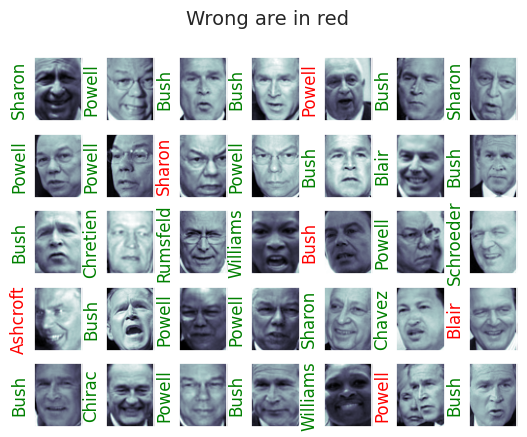

In [41]:
fig,ax = plt.subplots(5,7)
for idx , axidx in enumerate(ax.flat):
    axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
    fig.suptitle('Wrong are in red',size=14)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.76      0.72      0.74        18
     Colin Powell       0.68      0.88      0.76        48
  Donald Rumsfeld       0.70      0.67      0.68        24
    George W Bush       0.90      0.91      0.90        98
Gerhard Schroeder       0.89      0.77      0.83        22
      Hugo Chavez       1.00      0.70      0.82        20
   Jacques Chirac       1.00      0.56      0.72        16
    Jean Chretien       1.00      0.62      0.76        13
    John Ashcroft       0.67      0.73      0.70        11
Junichiro Koizumi       1.00      0.80      0.89        10
  Serena Williams       0.58      0.70      0.64        10
       Tony Blair       0.62      0.82      0.71        22

         accuracy                           0.80       312
        macro avg       0.82      0.74      0.76       312
     weighted avg       0.82      0.80      0.80       312



Text(109.44999999999996, 0.5, 'predicted label')

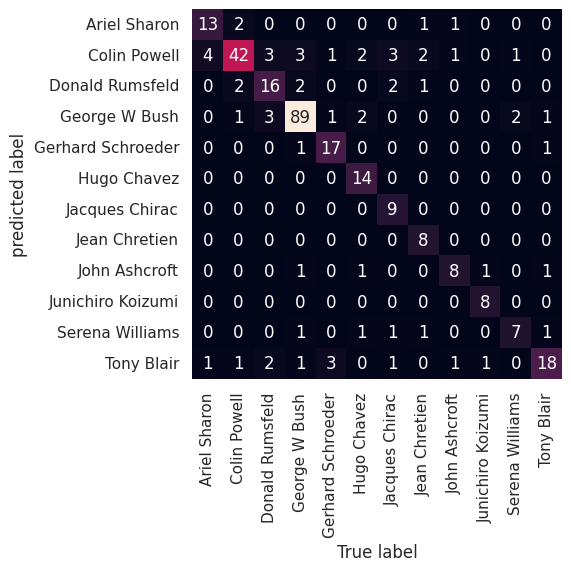

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")